# HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [98]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [99]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [100]:
crash = pd.read_csv("car_crashes2.csv");
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [101]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [102]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [103]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [104]:
#look at the number of rows w/ shape 
crash.dropna(inplace=True)
crash.shape

(51, 10)

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

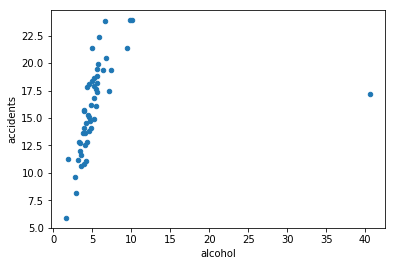

In [105]:
#use scatter plot to look at the outliers
#@ 40 there is one
%matplotlib inline 
crash.plot.scatter(x='alcohol', y='accidents')

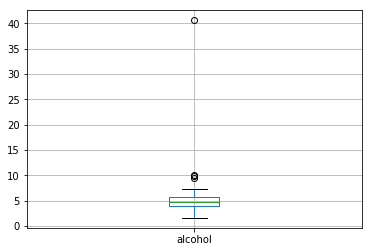

In [106]:
#with box plot roughly the same location for the outlier 
#as when i did scatter plot 
crash.boxplot(column=['alcohol'])

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [107]:
#since its roughly 40 
#ill look at values greater than or equal to 40
crash[crash.alcohol >= 40]

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


In [108]:
#look at only values smaller than the outliar
crash = crash[crash.alcohol < 40]
#look at the rows see that we only have 50 rows
crash.shape

(50, 10)

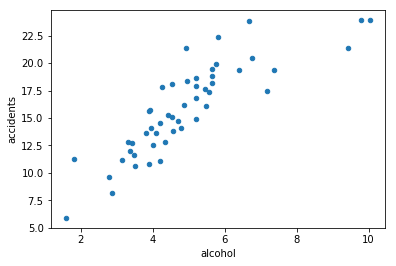

In [109]:
#want to look at the graph to see how the data has changed since exculing values
#smaller than 40
crash.plot.scatter(x='alcohol', y='accidents')

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [110]:
# average speeding in the US
US_SQL = "SELECT avg(speeding) AS United_States_Average_Speed FROM crash"
df = ps.sqldf(US_SQL)
df

,United_States_Average_Speed
0,5.01944


In [111]:
#average speeding in the North East
NE_SQL = "SELECT avg(speeding) AS North_East_Average_Speed FROM crash WHERE region = 'Northeast'"
df = ps.sqldf(NE_SQL)
df

,North_East_Average_Speed
0,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [112]:
#avg alcohol
avg_alcohol = "SELECT avg(alcohol) as average, region FROM crash GROUP BY region ORDER BY average ASC"
df = ps.sqldf(avg_alcohol)
df

,average,region
0,3.980500,Northeast
1,4.754077,West
2,4.996917,Midwest
3,5.414647,South


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [113]:
#mean, min and max speeding for each division
occurances = "SELECT avg(speeding) AS Mean, min(speeding) AS Minimum, max(speeding) AS Maximum FROM crash GROUP BY division ORDER BY mean"
df = ps.sqldf(occurances)
df

,Mean,Minimum,Maximum
0,4.084333,1.886,5.738
1,4.106600,3.384,4.968
2,4.293429,1.937,6.923
3,4.533250,2.640,7.332
4,5.030444,2.006,9.082
5,5.446000,1.792,9.100
6,5.812250,3.496,8.346
7,5.949400,4.200,9.450
8,6.333750,4.032,7.760


## Question 8. Answer Question 7 but use Pandas functions

In [114]:
#Print and calculate Mean w/ pandas 
Crash_Results = crash.groupby(['division'])['speeding']
print("Mean")
print(Crash_Results.mean())

Mean
division
East North Central    4.106600
East South Central    4.533250
Middle Atlantic       5.446000
Mountain              5.812250
New England           4.084333
Pacific               5.949400
South Atlantic        5.030444
West North Central    4.293429
West South Central    6.333750
Name: speeding, dtype: float64


In [115]:
#print and calculate max using pandas
Crash_Results = crash.groupby(['division'])['speeding']
print("\nMaximum")
print(Crash_Results.max())


Maximum
division
East North Central    4.968
East South Central    7.332
Middle Atlantic       9.100
Mountain              8.346
New England           5.738
Pacific               9.450
South Atlantic        9.082
West North Central    6.923
West South Central    7.760
Name: speeding, dtype: float64


In [116]:
#print and calculate min with pandas
Crash_Results = crash.groupby(['division'])['speeding']
print("\nMinimum")
print(Crash_Results.min())


Minimum
division
East North Central    3.384
East South Central    2.640
Middle Atlantic       1.792
Mountain              3.496
New England           1.886
Pacific               4.200
South Atlantic        2.006
West North Central    1.937
West South Central    4.032
Name: speeding, dtype: float64


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [117]:
#calculate the standard deviation
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("STD")
print(Crash_Results.std())

STD
           accidents  speeding   alcohol
region                                  
Midwest     3.588988  1.537451  1.824432
Northeast   3.077453  2.327773  0.872950
South       4.537037  2.220711  1.773576
West        3.325118  1.803138  1.910356


In [118]:
#calculate the skew
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("\nSkew")
print(Crash_Results.skew())


Skew
           accidents  speeding   alcohol
region                                  
Midwest     0.950845  0.121197  2.093467
Northeast   0.777587  1.051666  0.764250
South      -1.125839  0.172035  0.330988
West        0.064819  0.697441  1.159752


In [119]:
#calcuate south kurtosis
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("\nSouth Kurtosis")
print(crash[crash.region == 'South'][['accidents', 'speeding', 'alcohol']].kurtosis())


South Kurtosis
accidents    1.860064
speeding    -1.327699
alcohol      2.125568
dtype: float64


In [120]:
#calculate west kurtosis
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("\nWest Kurtosis")
print(crash[crash.region == 'West'][['speeding', 'accidents', 'alcohol']].kurtosis())


West Kurtosis
speeding    -0.465455
accidents   -1.048692
alcohol      2.219220
dtype: float64


In [121]:
#north East kurtosis
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("\nNortheast Kurtosis")
print(crash[crash.region == 'Northeast'][['accidents', 'speeding', 'alcohol']].kurtosis())


Northeast Kurtosis
accidents    0.726713
speeding     1.763520
alcohol      0.890501
dtype: float64


In [122]:
#calculate midwest kurtosis
Crash_Results = crash.groupby(['region'])['accidents', 'speeding', 'alcohol']
print("\nMidwest Kurtosis")
print(crash[crash.region == 'Midwest'][['accidents', 'speeding', 'alcohol']].kurtosis())


Midwest Kurtosis
accidents    2.067092
speeding    -0.737061
alcohol      5.597372
dtype: float64


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ac093a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ac0a6cf8>]], dtype=object)

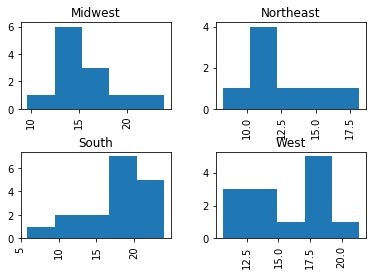

In [123]:
#plot histogram of accidents
crash['accidents'].hist(by=crash['region'], bins=5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

The highest skew can be found in the northeast and mid west.
The west stands out for having 0 skew and the south for having a negative value

The opposite is true for kurtosis, while the south and midwest has postive kurtosis, the northeast is at zero and the west is in the negative. 

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [124]:
crash.corr()
#which factors among speeding, alcohol and ins_premium will affect accidents the most?
#Ans ->alcohol causes the most accidents

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


### Now Load a different dataset (MPG dataset number 3)

In [125]:
#load in mpg
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [126]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [127]:
#There are three things that need fixing
# horsepower, weight and mpg 
#using the mean to fix
HorsePowerMean = mpg.mean().horsepower
MPGMean        = mpg.mean().mpg
WeightMean     = mpg.mean().weight

In [128]:
#now that i have the mean, i can fix the missing vlaues
#by imputing vlaues from the mean
mpg.horsepower.fillna(HorsePowerMean, inplace = True)
mpg.weight.fillna(WeightMean, inplace = True)
mpg.mpg.fillna(MPGMean, inplace = True)

In [129]:
#check to see for the missing values aftter modfications
print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
